# <font color='crimson'>Red Wine Quality Prediction</font>

### Importing all necessary modules

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,precision_score,recall_score,accuracy_score,f1_score,roc_curve,roc_auc_score,confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

## <font color='crimson'>Data Reading</font>

In [68]:
# Reading the data file by uploading the CSV file to the Jupyter Notebook 
wine_df = pd.read_csv('winequality_red.csv')

In [69]:
# Displaying the Dataset
wine_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [70]:
# Checking the shape of the data
wine_df.shape

(1599, 12)

In [77]:
# Viewing the complete information of the data
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [79]:
# Displaying the first 10 rows of the data for quick inspection
wine_df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [81]:
# Checking for the null-values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## <font color='crimson'>Target variable Analysis (Dependent Variable)</font>

In [84]:
# Understanding the distribution of values in target column (quality)
pd.DataFrame(wine_df.quality.value_counts())

count
quality       
5          681
6          638
7          199
4           53
8           18
3           10

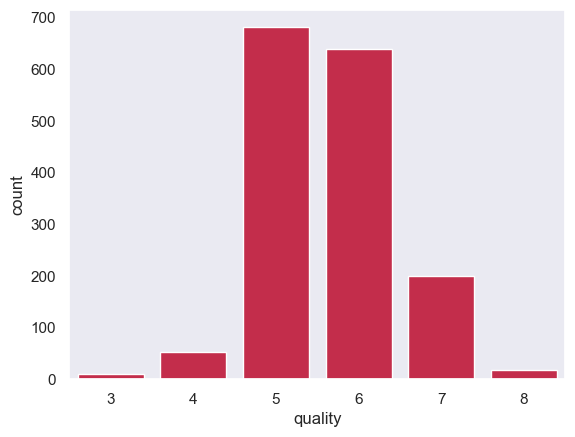

In [86]:
sns.countplot(x='quality',palette=['crimson'], data=wine_df)
plt.show()

- The Above Bar Plot helps in understanding the distribution of wine quality ratings, displaying the frequency of the each quality rating occurance in the dataset. 
- 5 and 6 seems to have highest number of frequency in quality ratings.

## <font color='crimson'>Reducing Target variable classes</font>

- Modified the quality column by replacing the values with 5 and 6 for standardization,  
- Preparing data for analysis and modelling, ensuring the data is clean, consistent and aligns for the analysis

In [91]:
wine_df['quality'] = wine_df['quality'].replace({3: 6, 8: 5, 4: 5, 7: 6})

In [93]:
wine_df.quality.value_counts().sort_index().to_frame(name='Count').reset_index().rename(columns={'index': 'Quality'})

quality  Count
0        5    752
1        6    847

- Counted the Occurrences of each wine quality level (from the target column), sorted them by quality values in ascending order, with two columns Quality and Count.

- 'Quality' : Contains the wine quality levels, 
- 'Count' : Contains the number of Occurrences of each quality level after replacing 5 and 6.

## <font color='crimson'>Exploratory Data Analysis</font>

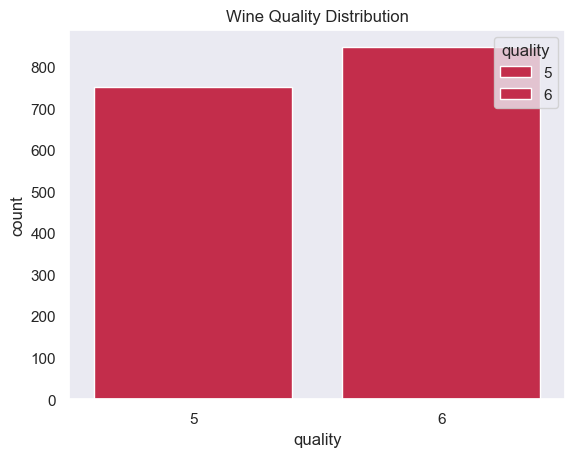

In [97]:
sns.countplot(x='quality',hue='quality',palette=['crimson'],data=wine_df)
plt.title("Wine Quality Distribution")
plt.show()

- The Above Bar Plot helps in understanding the distribution of wine quality ratings, displaying the frequency of the quality rating occurance in the dataset after modifying the target variable for clean and consistent analysis. 
- In my point of view, based on the dataset majority of the wines are moderate quality.

## Univariate Analysis

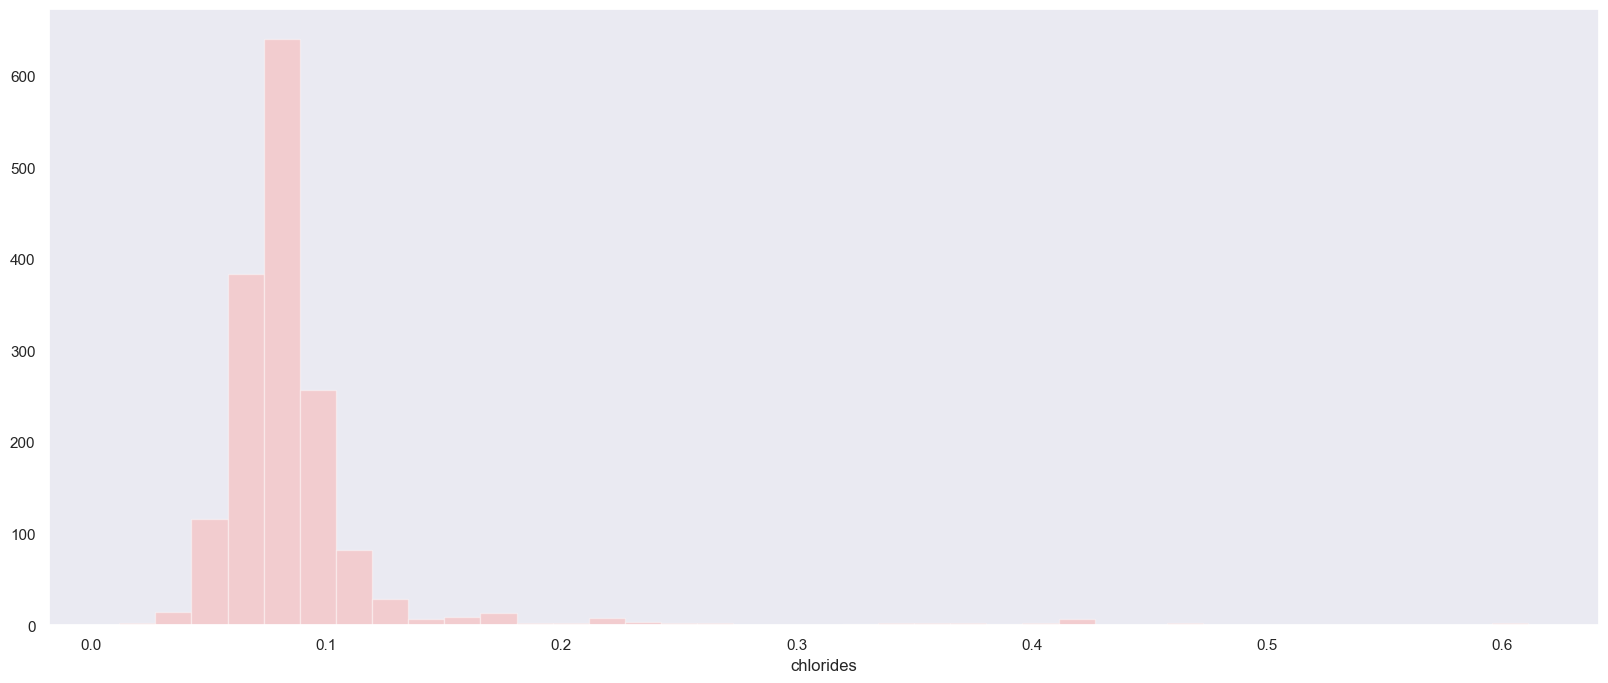

In [101]:
# Visualizes the distribution of values in Chlorides
plt.figure(figsize=(20,8))
sns.set_style("dark")
sns.distplot(wine_df.chlorides,kde=False, bins=int(np.sqrt(1599)),color="r")
plt.show()

- The above histogram has been plotted for the "chlorides" column showing the distribution of chloride levels in the wine dataset, revealing how frequently certain chloride values appear, indicating the overall shape of the data (e.g., skewed or symmetric). 
- I've calculated number of bins based on the dataset size (1599) for more detailed insights. 
- The above analysis helps in understanding trends or comparing chloride levels with other wine features. 

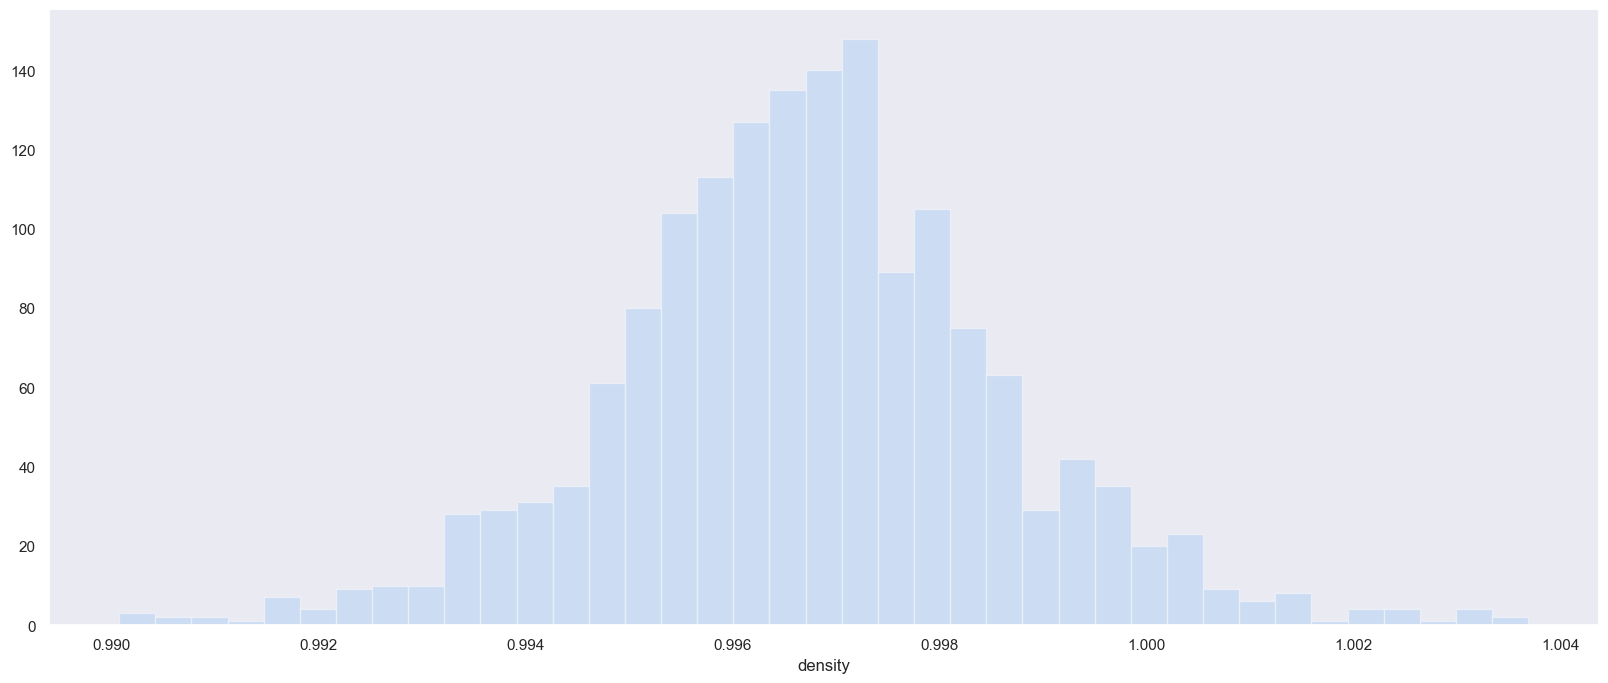

In [104]:
# Visualizes the distribution of values in density
plt.figure(figsize=(20,8))
sns.set_style("dark")
sns.distplot(wine_df.density,kde=False, bins=int(np.sqrt(1599)),color="b")
plt.show()

- The above histogram has been plotted for the wine density values in the dataset, without a KDE curve, dividing the data into approximately 40 bins based on the number of samples.
- Here I've analyzed Wine density, and the histogram depicts how the density values are distributed across the dataset.
- The above analysis plotted to understand the distribution of wine density values in the dataset, that shows frquency of different density values occurrance.
- The bars are representing the count of samples falling within each density range. 

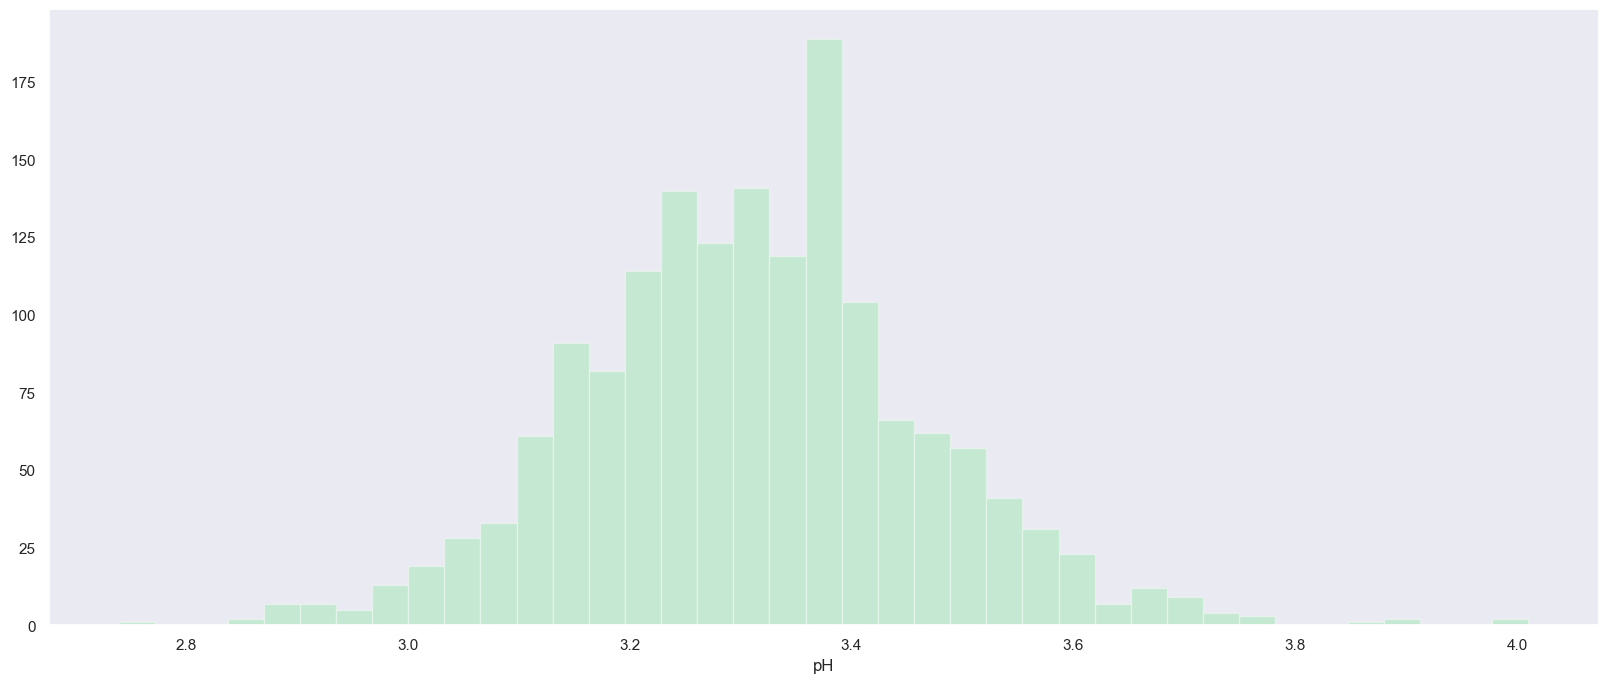

In [107]:
# visualizes the distribution of pH Values
plt.figure(figsize=(20,8))
sns.set_style("dark")
sns.distplot(wine_df.pH,kde=False, bins=int(np.sqrt(1599)),color="g")
plt.show()

- The above plot helped me in understanding the distribution of pH values in the wine dataset. Here we can observe whether the majority of wines have a pH value leaning towards acidic, neutral, or slightly basic.
- With the absence of a KDE curve we are focusing purely on the raw count of occurrences within each bin, which shows a direct view of the data's distribution.
- The above plot is useful to determine the frequency of different pH levels in the wine samples and they may be useful for analyzing wine quality or acidity trends in the dataset.

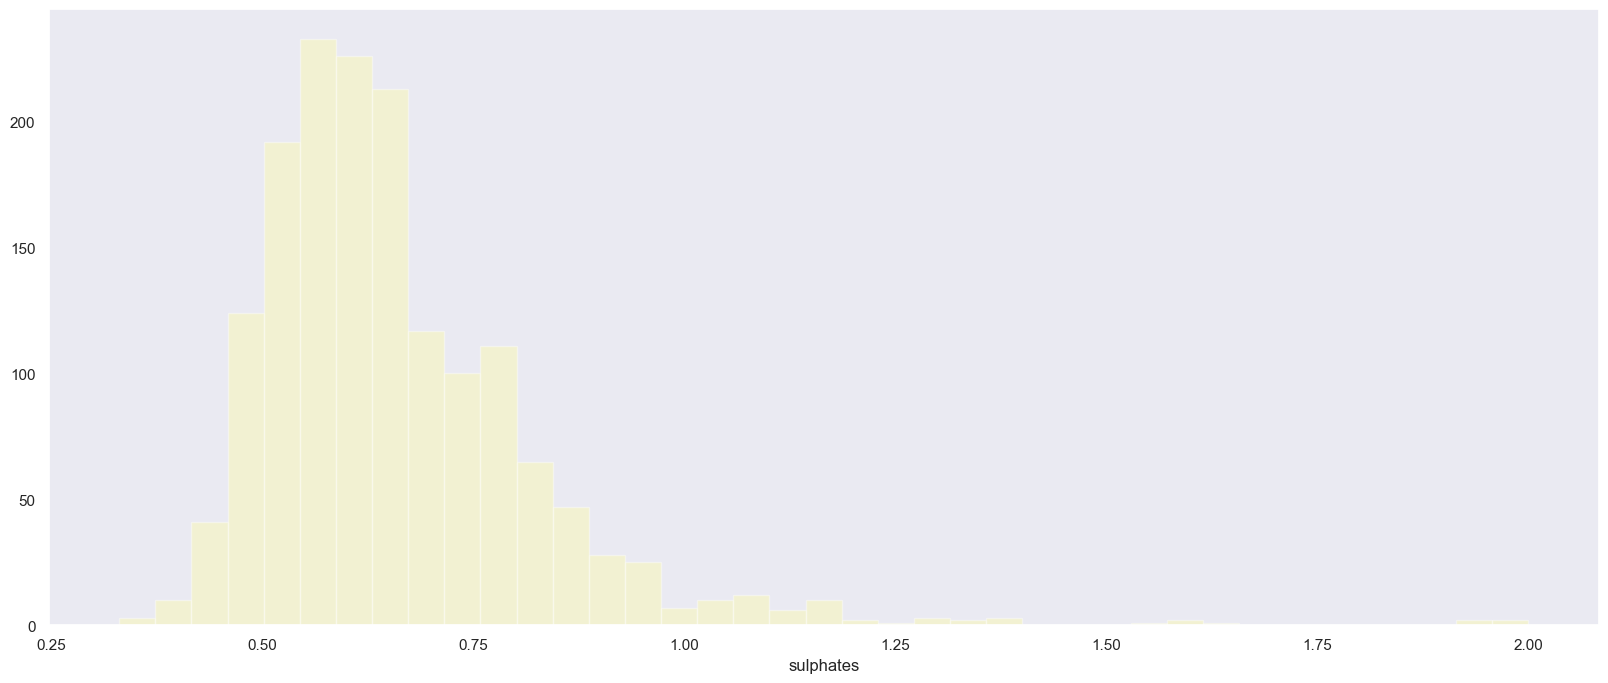

In [110]:
# Visualizes the distribution of sulphates
plt.figure(figsize=(20,8))
sns.set_style("dark")
sns.distplot(wine_df.sulphates,kde=False, bins=int(np.sqrt(1599)),color="y")
plt.show()

- The above plot helps us in understanding the distribution of sulphates in the wine dataset.
here, we can observe whether the majority of wine samples have low, moderate, or high sulphate levels.
- The above visualization helps in analyzing the frequency of different sulphate levels in the wine dataset, providing the insights of distribution of  sulphates across the wine samples.
- The histogram showing more samples concentrated on the left (lower sulphate values), it suggests that most wines in the dataset have relatively low sulphate levels, which could affect the flavor or shelf life.

## MultiVariate Analysis

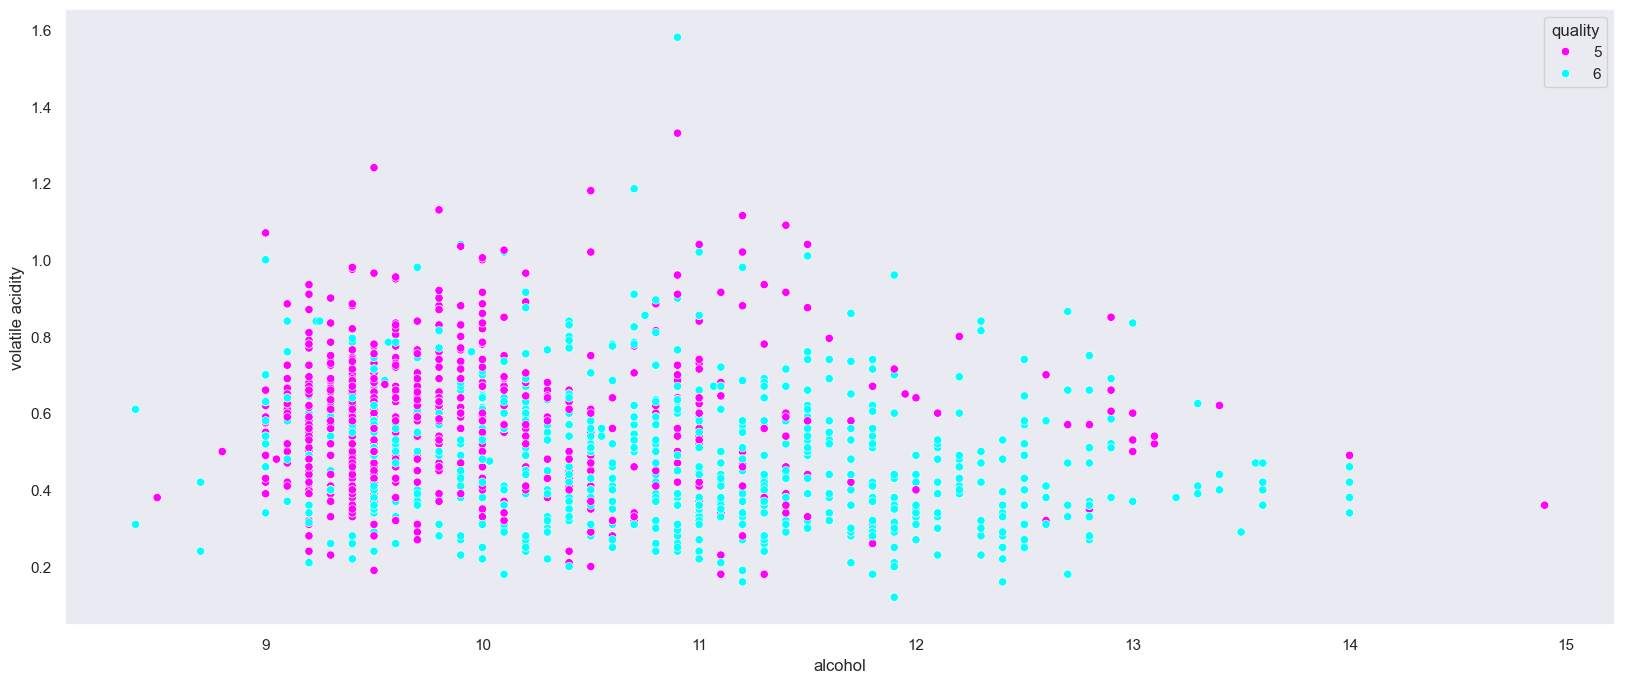

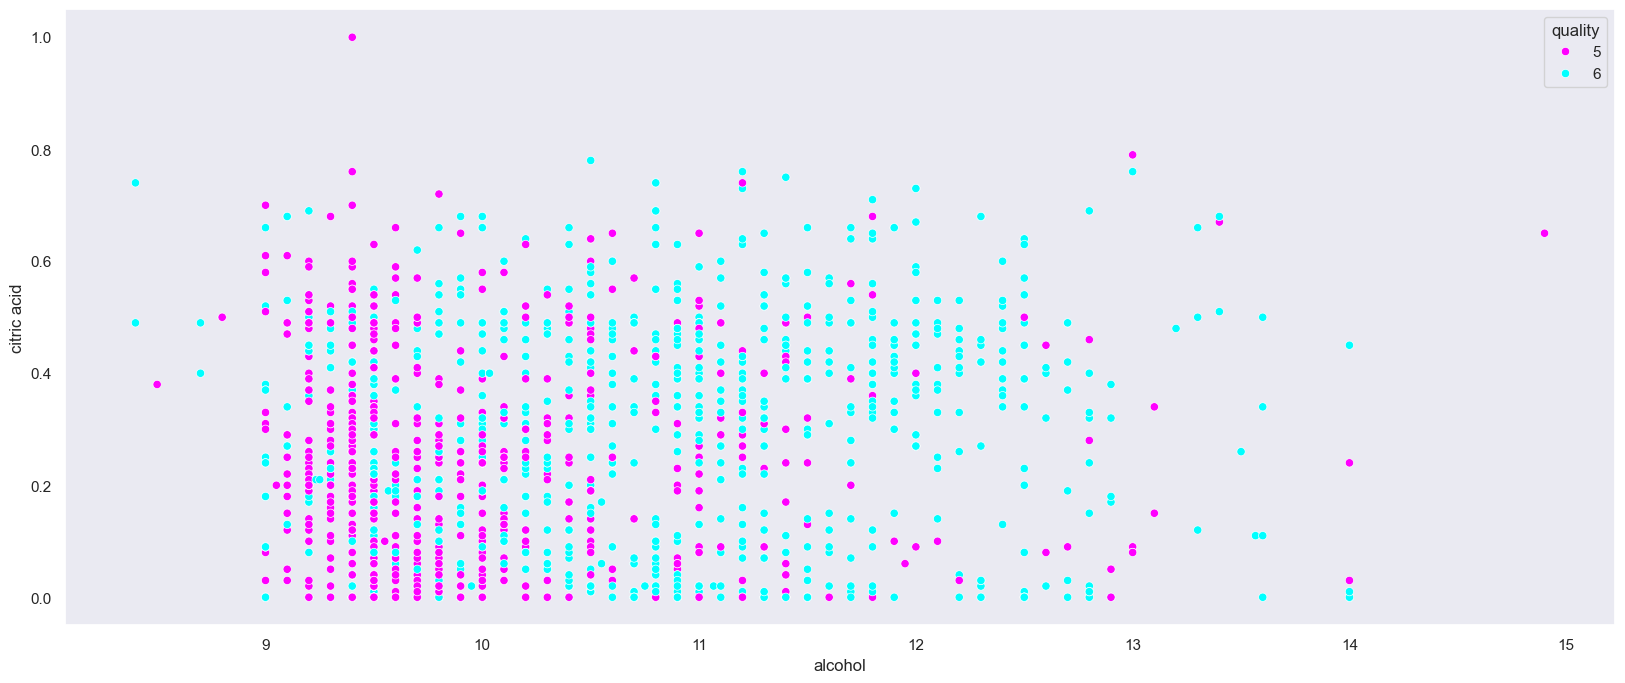

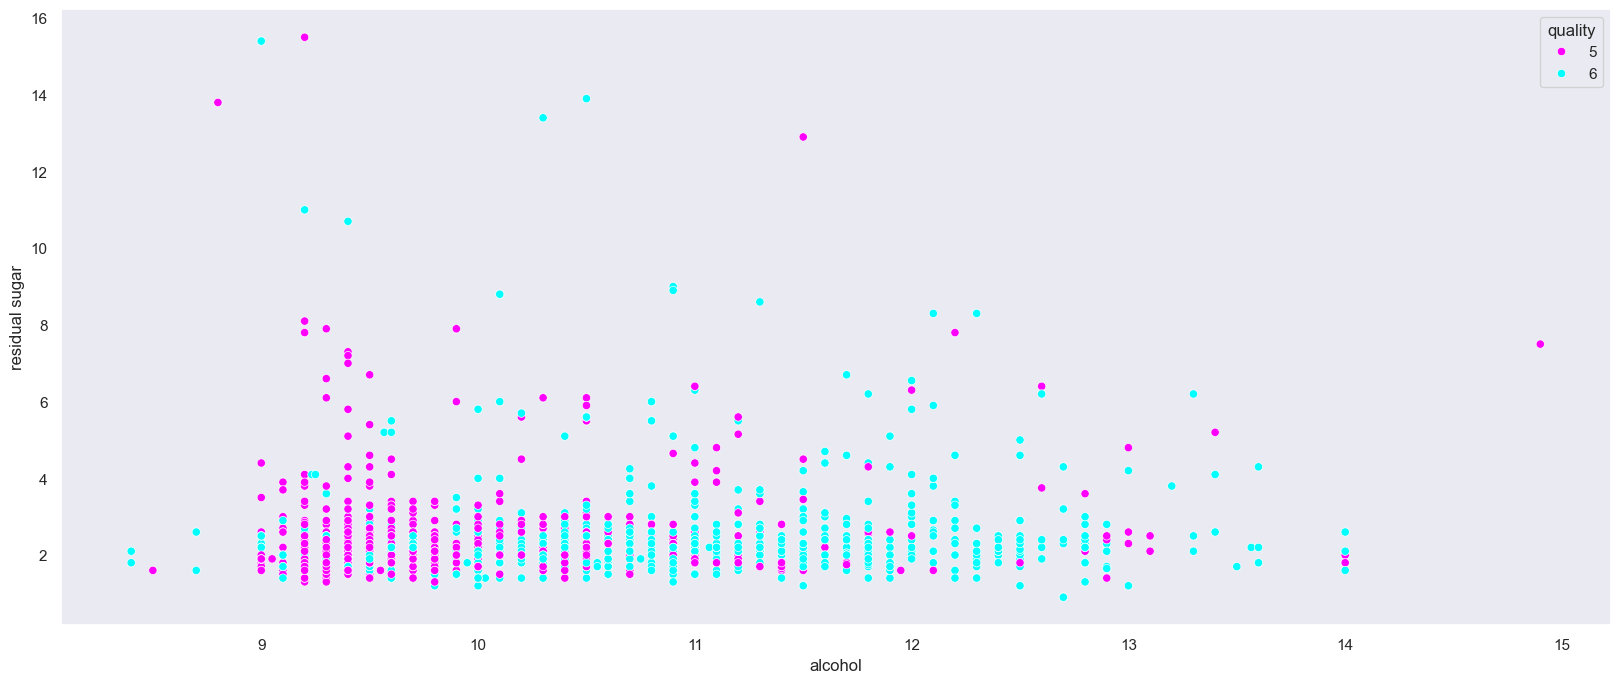

In [114]:
for i in ['volatile acidity','citric acid','residual sugar']:
    plt.figure(figsize=(20,8))
    sns.set_style("dark")
    sns.scatterplot(data=wine_df,y = i, x='alcohol',hue ='quality',palette=["magenta","cyan"])
    plt.show() 

- The above three scatter plots displays the relationship between the features volatile acidity, citric acid, and residual sugar against the alcohol - content in wine.
- Each plot uses quality to color the points based on the wine quality.
- The plots above shows trends or patterns between wine characteristics and alcohol content accross different quality levels.
- Alcohol vs. Volatile Acidity: In this plot, we can assess how acidity levels changes with varying alcohol content and patterns in terms of wine quality.
- Alcohol vs. Citric Acid: In this plot, we explored wines with different alcohol levels varying citric acid content, and the affect of wine quality.
- Alcohol vs. Residual Sugar: This plot Examines the relationship between alcohol content and the sweetness (residual sugar) of the wine, and the relation to quality.
- To summarize, these scatter plots visually explore potential correlations between alcohol content and various wine characteristics, with the added benefit of understanding the relationships based on wine quality. These plots provide us insights into the features that might contribute to a higher-quality wine. 

### PLOT 2

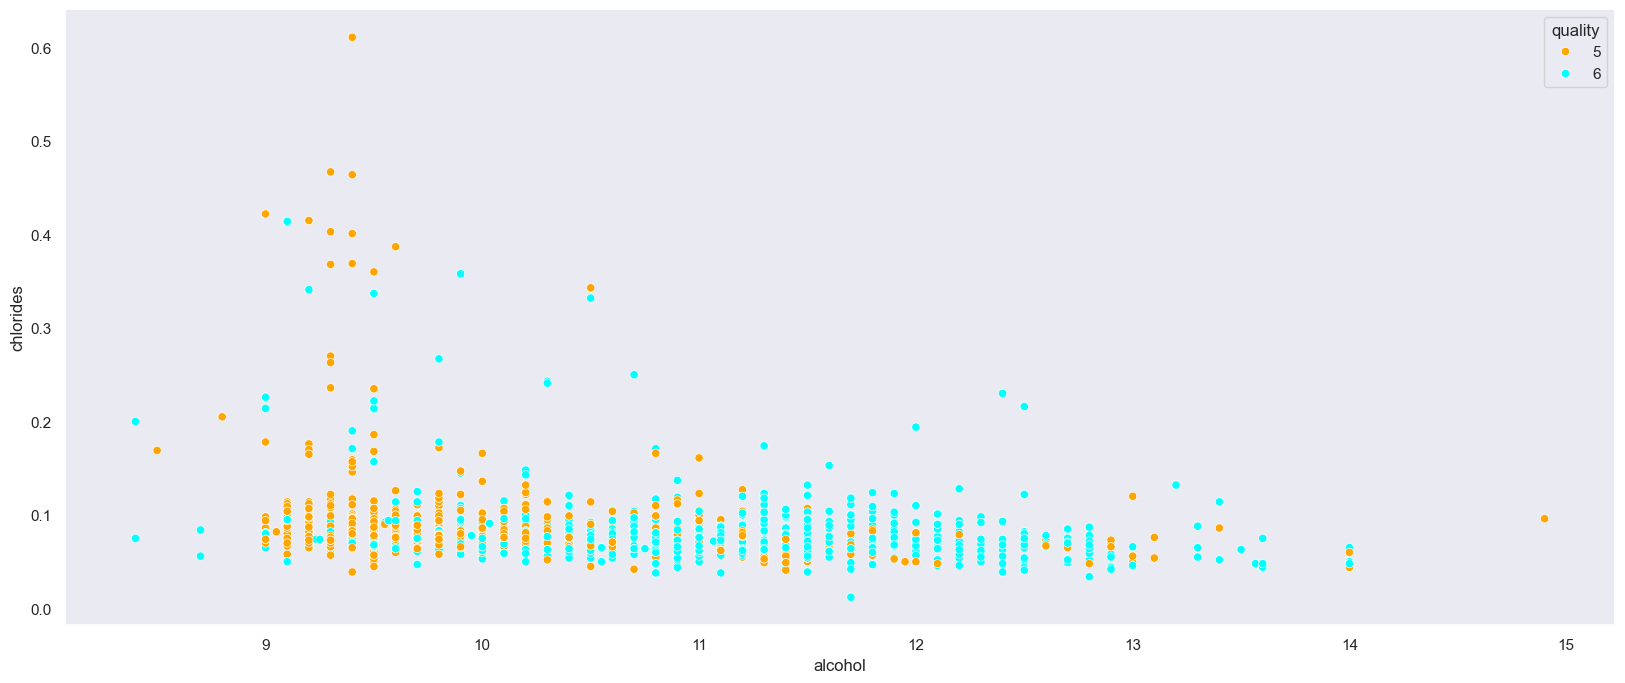

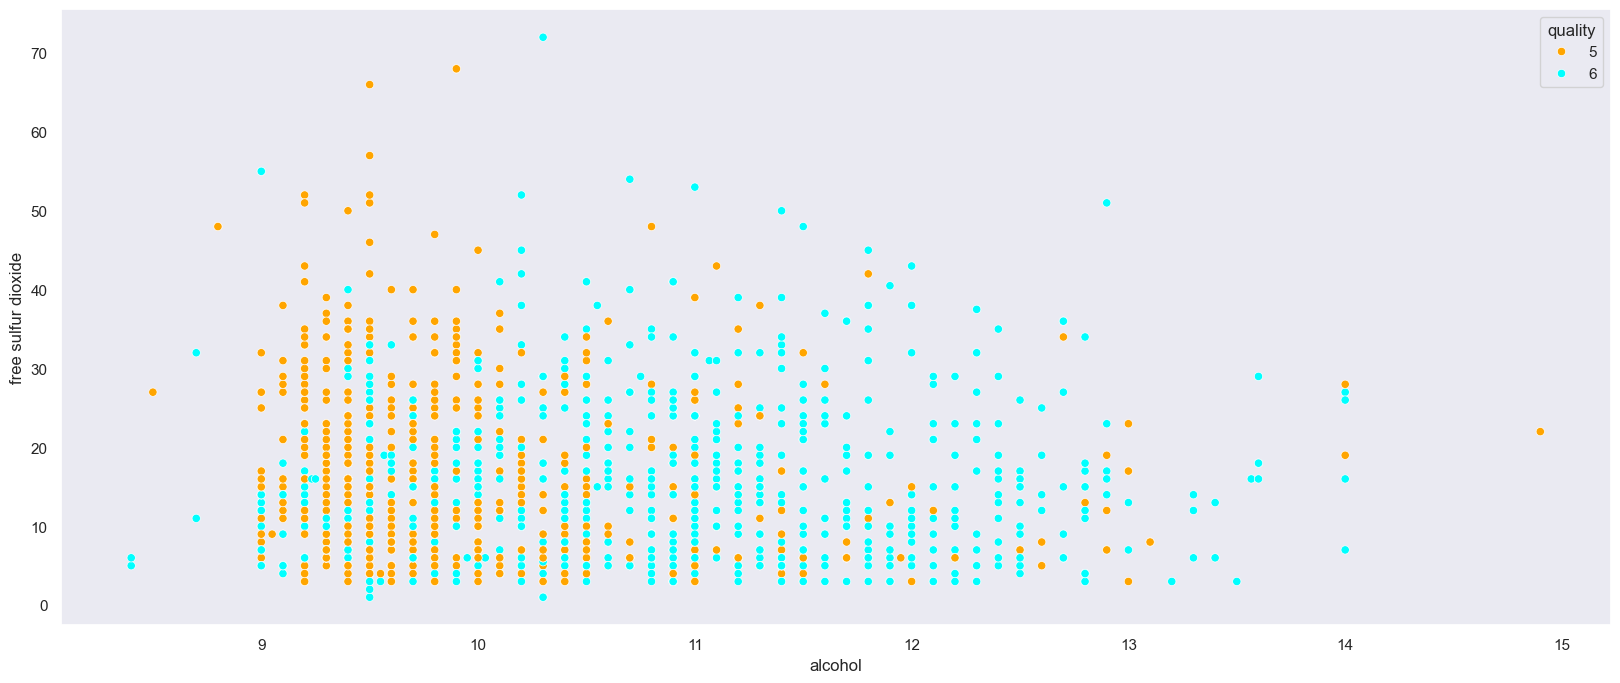

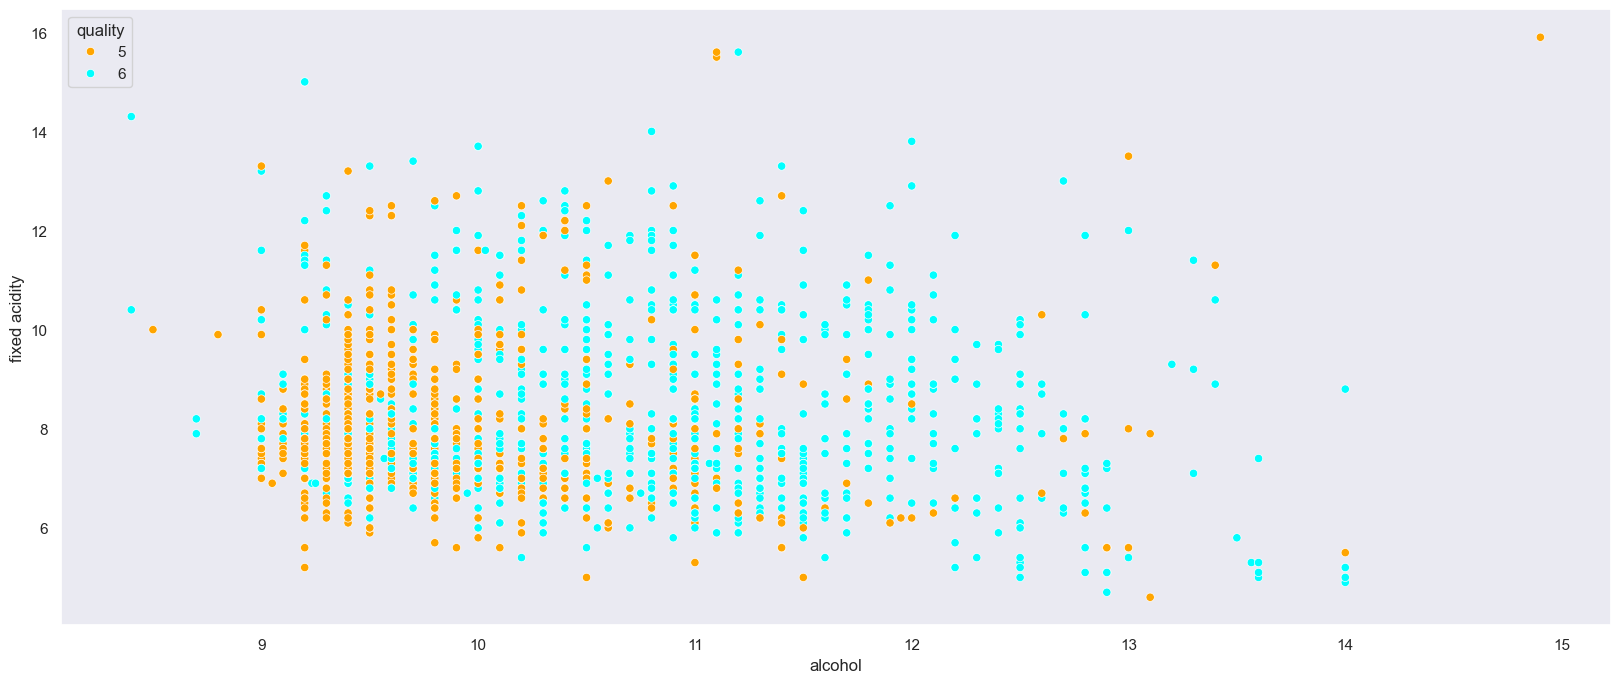

In [118]:
for i in ["chlorides","free sulfur dioxide","fixed acidity"]:
    plt.figure(figsize=(20,8))
    sns.set_style("dark")
    sns.scatterplot(data=wine_df,y = i, x='alcohol',hue ='quality',palette=["orange","cyan"])
    plt.show()

- The above three scatter plots displays the relationship between the features Chlorides, free sulphur dioxide, and fixed acidity against the alcohol content in wine.
- Each plot uses quality to color the points based on the wine quality.
- The plots above shows trends or patterns between wine characteristics and alcohol content accross different quality levels.

- Key Insights to look after:
- Color Representation: The points are colored based on wine quality (hue='quality'), where orange and cyan are used to distinguish between different quality levels. This allows you to see whether certain ranges of alcohol content and other chemical properties are linked to high or low-quality wines.
- Exploring Relationships: The scatter plots visually examine meaningful correlations between alcohol content and the chosen wine properties (chlorides, free sulfur dioxide, and fixed acidity). These visualizations provide insights on affect of alcohol content with chemical charecteristics and the factors contribute to overall wine quality.
- On a nutshell, This series of scatter plots are allowing to explore alcohol content correlation with chlorides, free sulfur dioxide, and fixed acidity, and variation of wine quality within these relationships.

### Plot 3

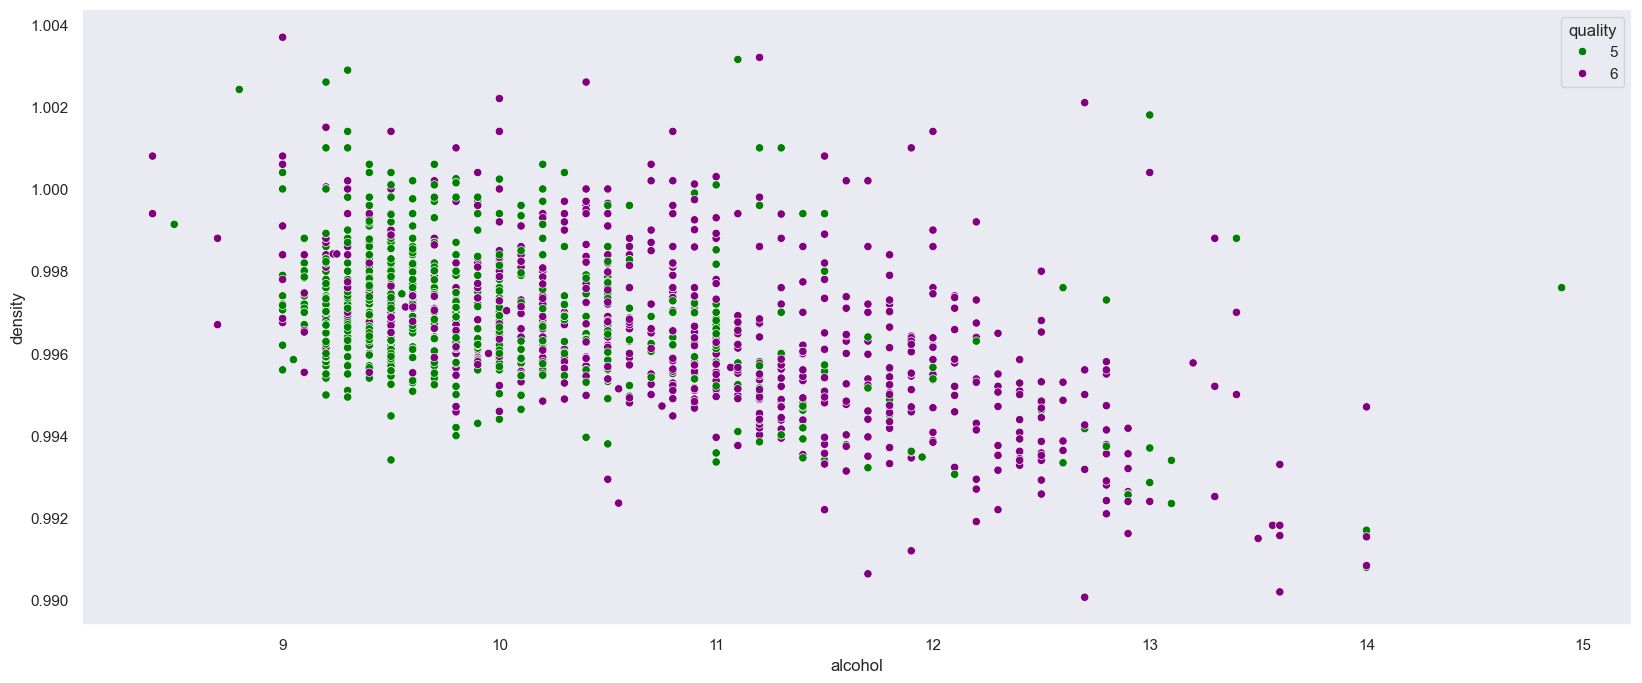

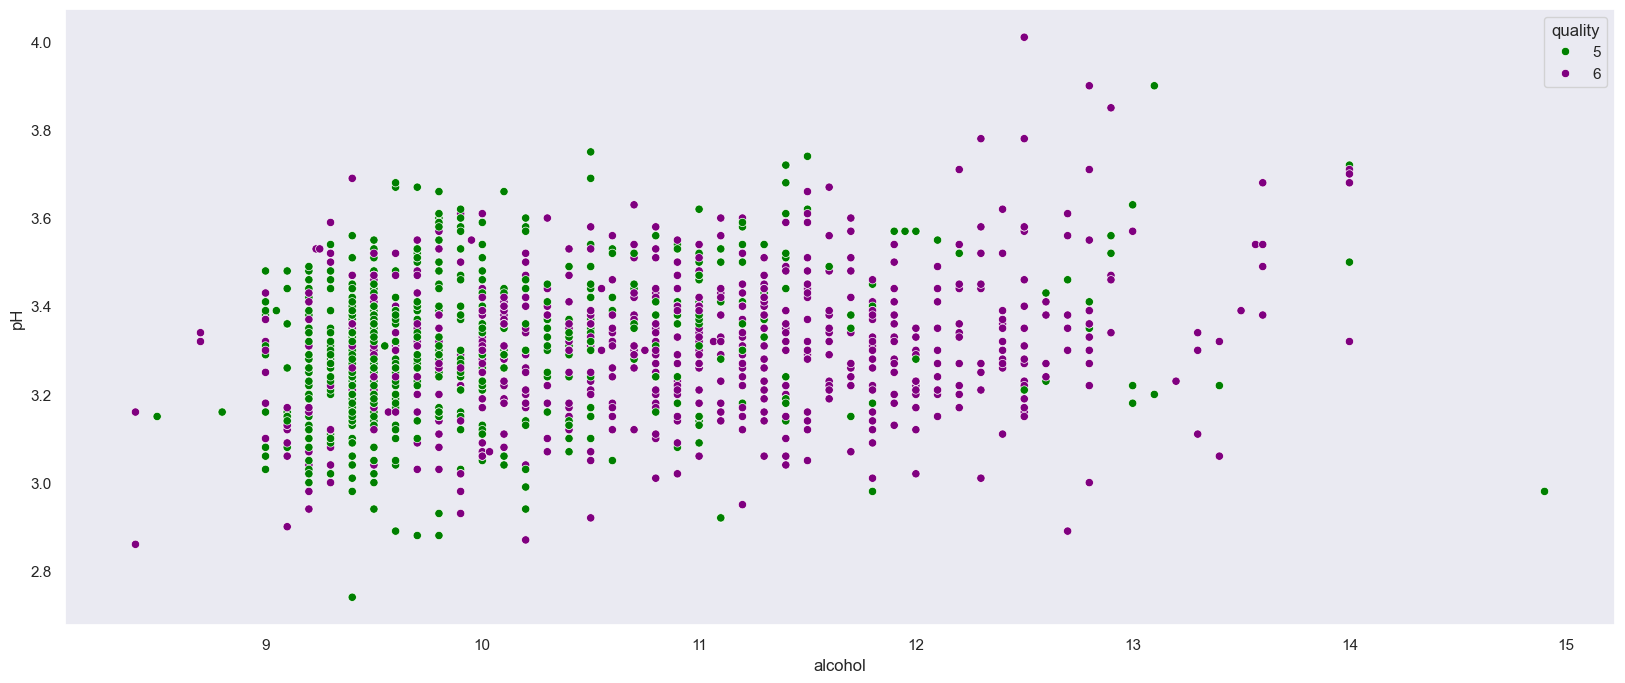

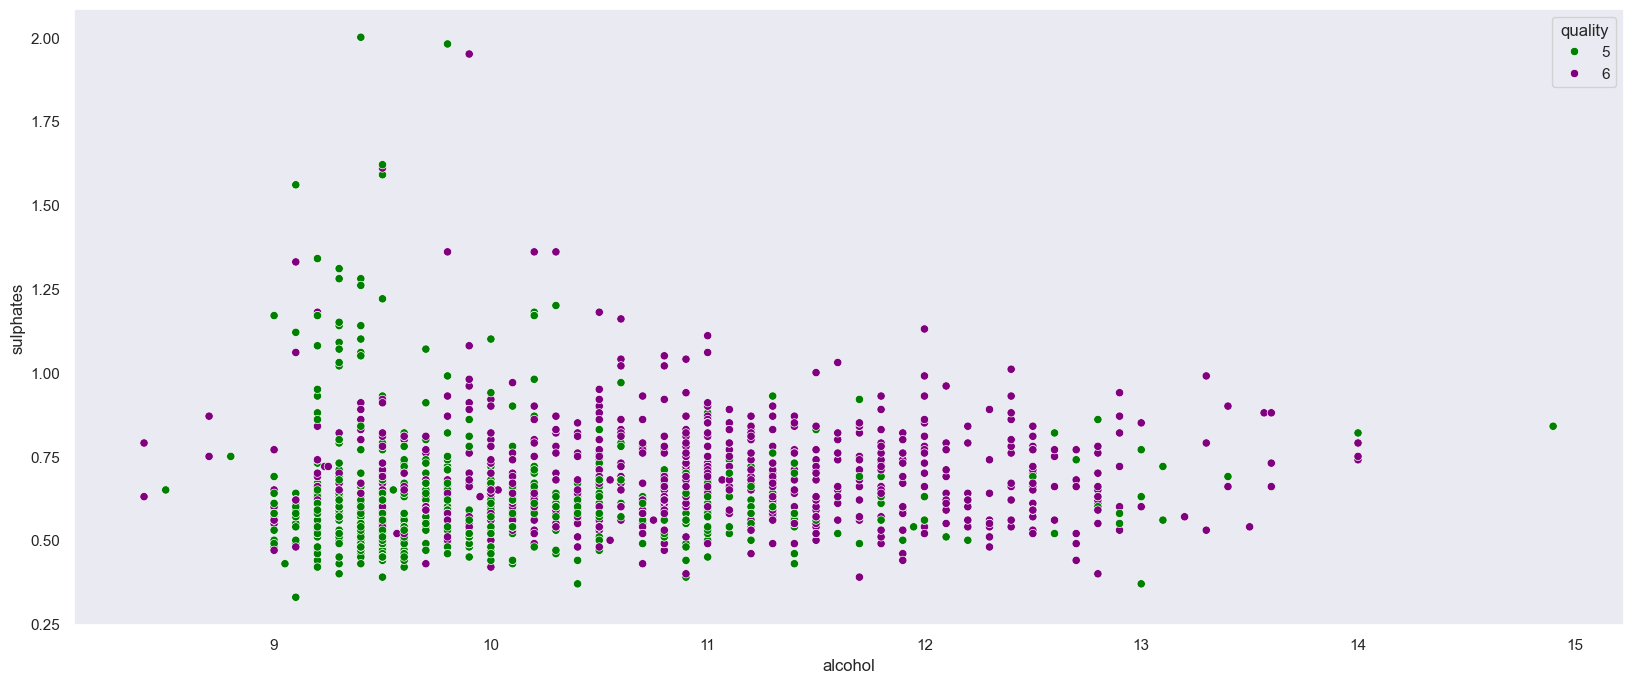

In [123]:
for i in ["density","pH","sulphates"]:
    plt.figure(figsize=(20,8))
    sns.set_style("dark")
    sns.scatterplot(data=wine_df,y = i, x='alcohol',hue ='quality',palette=["green","purple"])
    plt.show()

- The above three scatter plots displays the relationship between the features density, pH, and sulphates against the alcohol content in wine.
- Each plot uses quality to color the points based on the wine quality.
- The plots above shows trends or patterns between wine characteristics and alcohol content accross different quality levels.
- Color Representation (Hue): The color of the points (green and purple) represents wine quality, which provides a quick visual cue for how quality varies across different levels of alcohol content and the other wine properties (density, pH, and sulphates).
- Green might represent one class of quality (e.g., lower quality), while purple might represent another (e.g., higher quality).

- Exploring Relationships:
- These scatter plots represents exploration of alcohol content that influencing key properties like density, pH, and sulphates.
- We can observe whether wines with higher alcohol content tend to have lower density, a particular range of pH values, or a specific level of sulphates, and correlation of these factors with wine quality.
- Overall, These scatter plots provide a visual analysis of alcohol content interaction with three important properties in wine, i.e., density, pH, and sulphates. 
- By using color (green and purple) we distinguished between wine quality levels, the plots make it easier to identify patterns and relationships between these factors. This visualization is valuable for understanding the affect of alcohol content composition and quality of the wine.

## Correlation Analysis

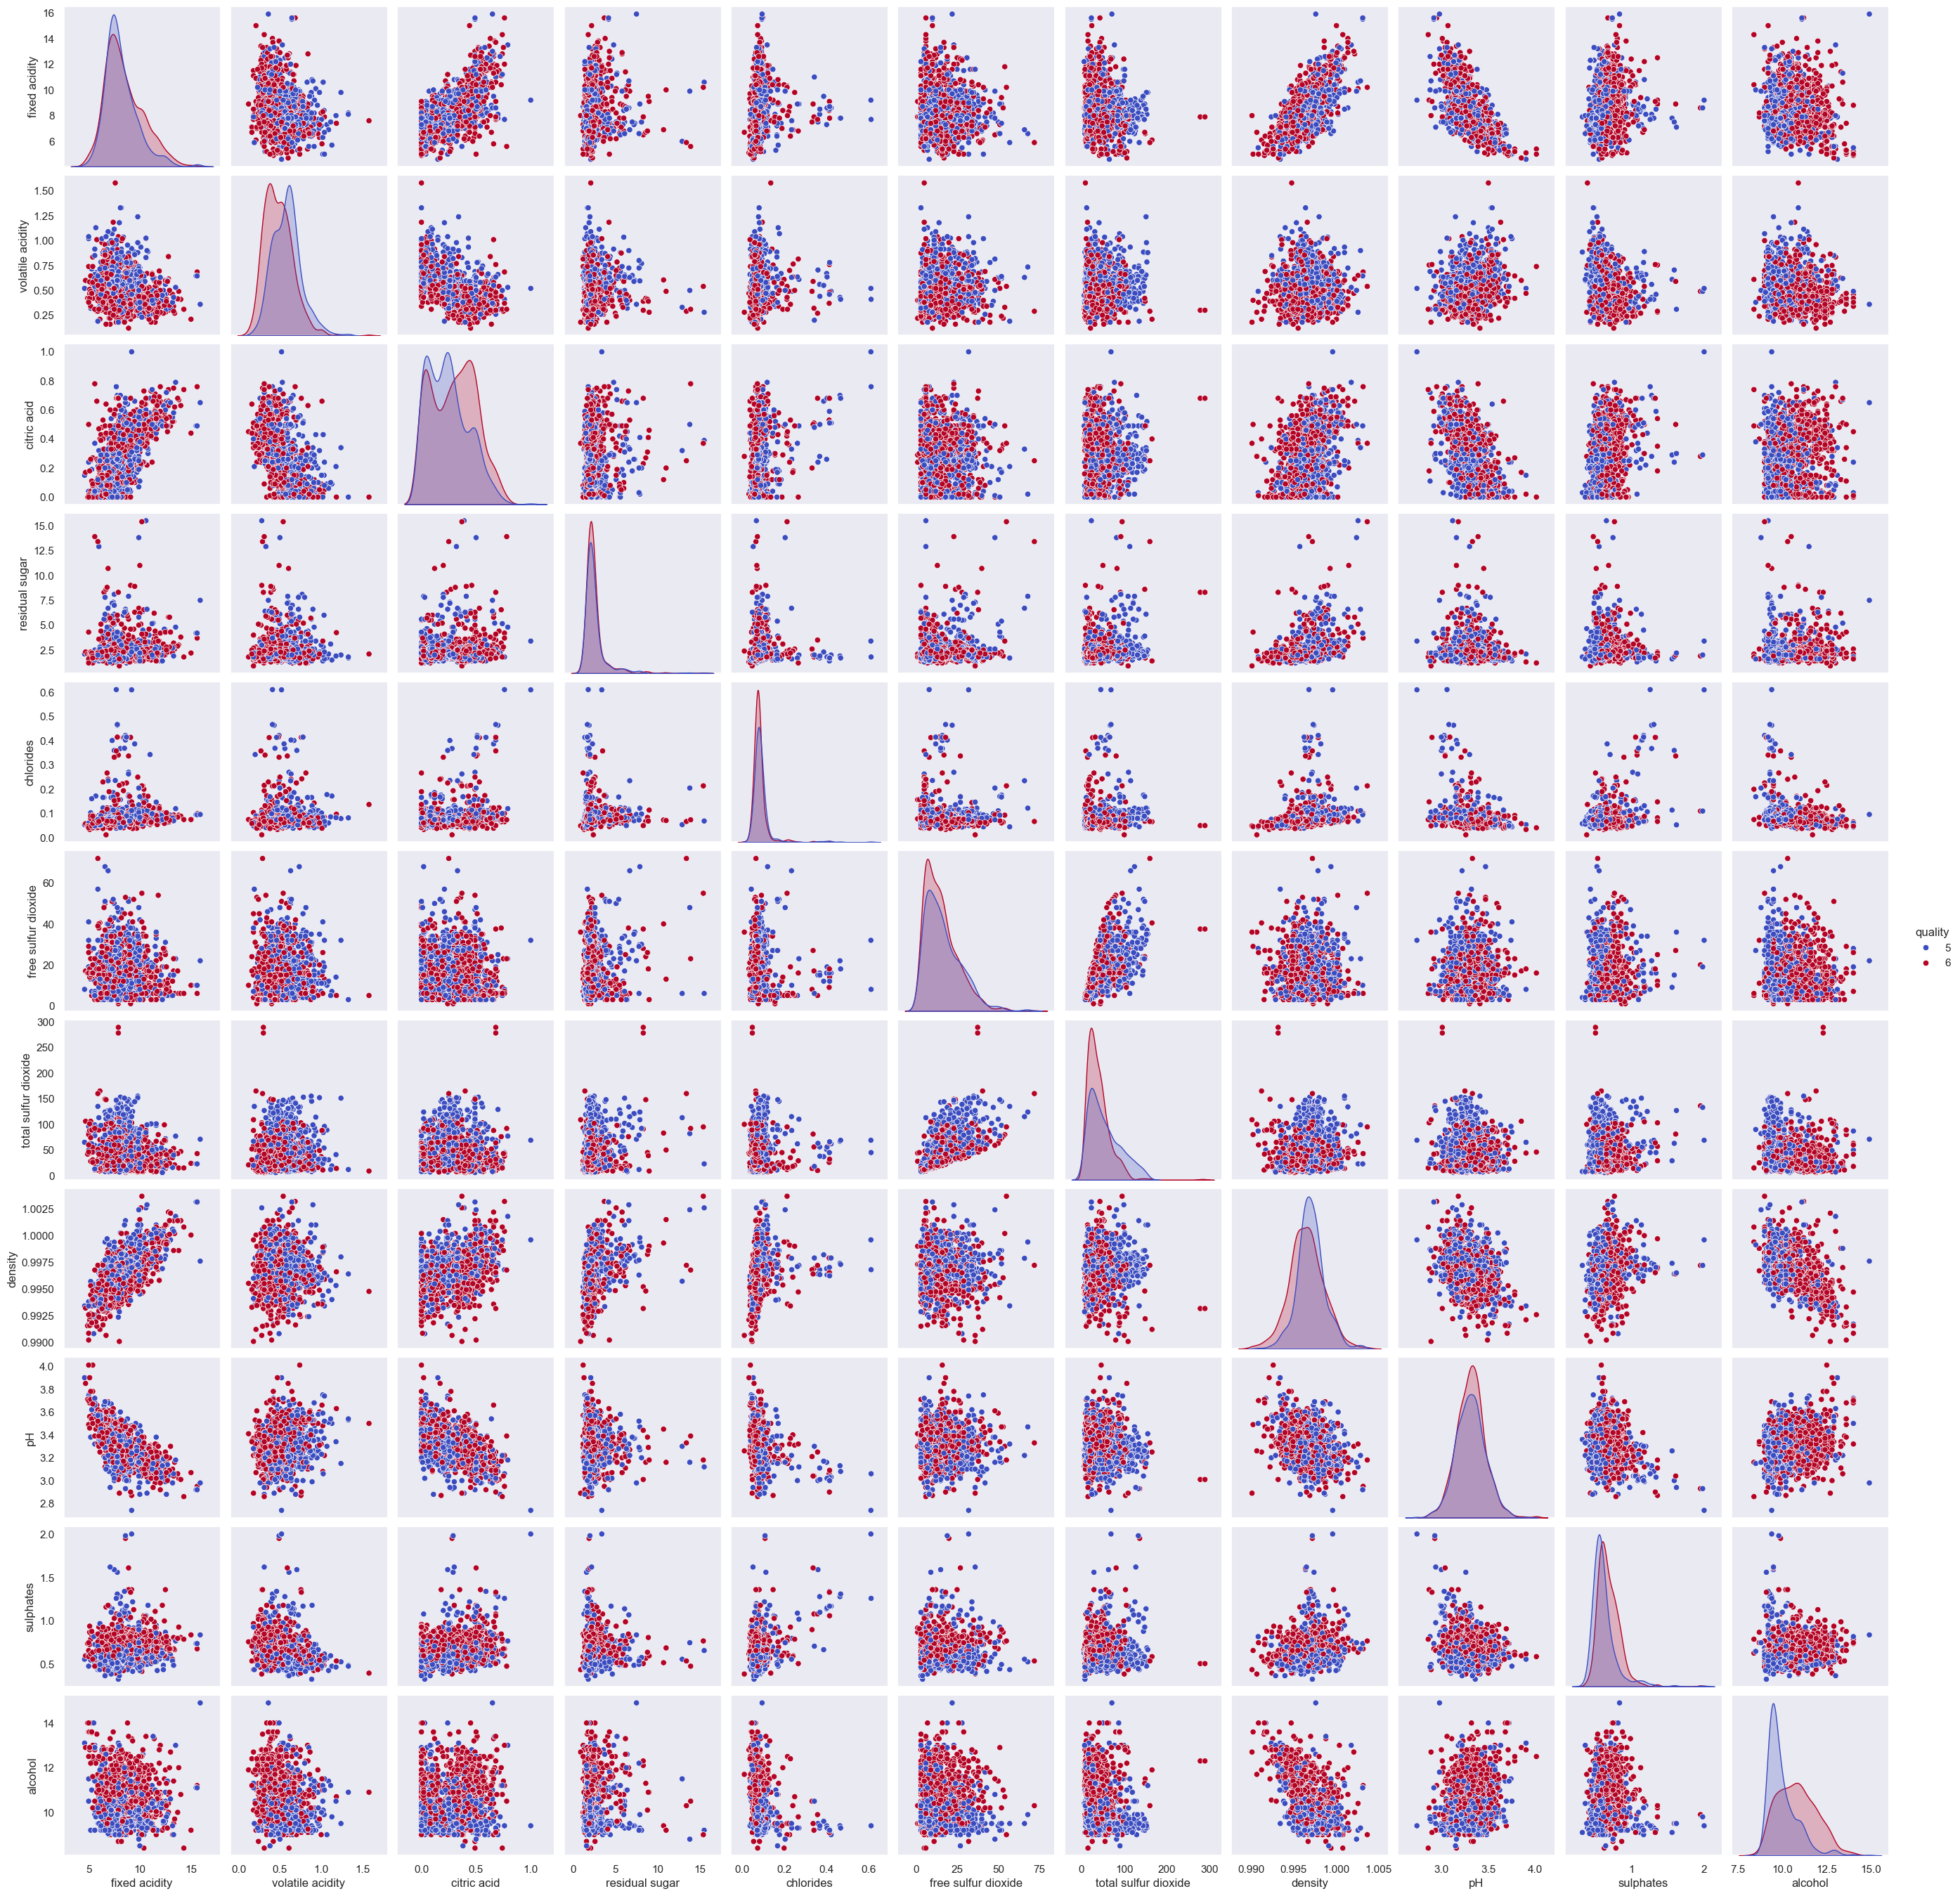

In [128]:
palette = 'coolwarm'
sns.pairplot(wine_df,hue='quality', palette = palette)
sns.set(style="whitegrid", palette="pastel")
plt.show()

- The above pair plot visualizes the pairwise relationships between multiple wine characteristics.
- we can see a comprehensive exploration of relationships of different features with each other and the relationships that are varying with different quality levels.
- The diagonal plot is representing the density plot distribution of each feature, while the scatter plot is showing the clusters between each feature pairs with data points color-coded based on the quality column with cool-to-warm palette.

## Description of the Data

In [132]:
wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.529706  
std       0.154386     0.169507     1.065668     0.499273  
min       2.740000     0.330000     8.400000     5.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     6.000000

In [134]:
wine_df.describe().transpose()

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.529706   0.499273  5.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    6.00000

## Heatmap for Correlation Analysis

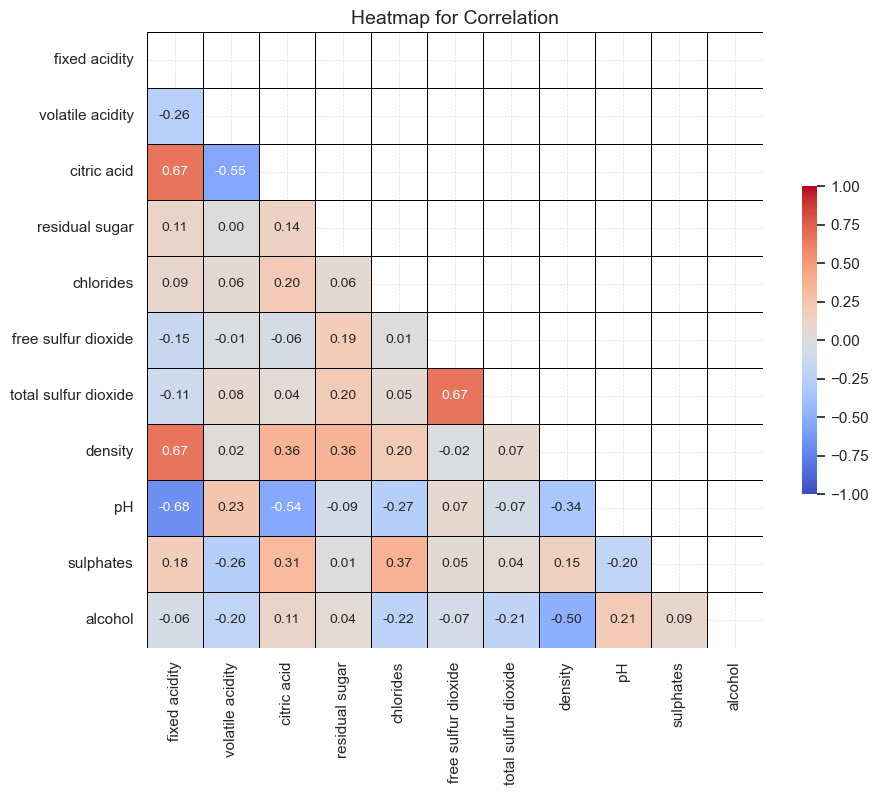

In [137]:
sns.set(style="white")
# Generate a large random dataset
df = wine_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
# Compute the correlation matrix
corr_matrix = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool_))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmin=-1,vmax=1, center=0,
            square=True, linewidths=.5, linecolor='black', annot=True, fmt = '0.2f', annot_kws={'size':10}, cbar_kws={"shrink": .5})
ax.set_title('Heatmap for Correlation', fontsize=14)
plt.grid(True, linestyle='--', linewidth = 0.5, alpha = 0.7)

- The above heatmap visualizes the correlations between different features in the dataset. 
- The darker the square, the stronger the correlation (positive or negative) between two variables.
- The upper triangle of the matrix is hidden for clarity. 
- The above plot identifies relationships, such as which features are more strongly correlated with each other, and can aid in feature selection for further analysis or modeling.

# <font color='crimson'>--------------------------Model Building--------------------------</font>

## Data Splitting

In [142]:
# X contains the feature columns from the dataset excluding the target variable 'quality'
X = wine_df.drop(['quality'],axis=1)
# Y Contains the Target values from the quality column
Y = wine_df['quality'].values
# Splitting the dataset into training and testing set in the ratio of 70:30
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [144]:
# Displaying the shape of training and testing feature set 
print(X_train.shape, X_test.shape)

(1119, 11) (480, 11)


In [146]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

- Consistency: The scaler should be fitted only on the training data. 
- The above code ensures that the test data is scaled consistently based on the training data’s statistics, avoiding data leakage.
- Avoiding Data Leakage: By fitting the scaler only on the training data and using it to transform both training and testing data, you avoid introducing information from the test set into the training process, which can lead to overfitting and unrealistic performance estimates.
- This ensures that both the training and testing data are rescaled properly, maintaining the integrity of the test set.

In [149]:
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# <font color='crimson'>Logistic Regression</fot>

In [152]:
# Initializing and Training the logistic regression model
lr_model =LogisticRegression(random_state=42, solver="lbfgs",penalty='l2',C=2,class_weight='balanced')
lr_model.fit(X_train,y_train)

# Make predictions on the test set
y_predict_lr = lr_model.predict(X_test)

# Calculate and print training accuracy
training_accuracy = lr_model.score(X_train,y_train)
print('Training Accuracy: {:.2f}%'.format(training_accuracy * 100))

# Calculate and print testing accuracy
testing_accuracy = lr_model.score(X_test,y_test)
print('Testing Accuracy: {:.2f}%'.format(testing_accuracy * 100))

Training Accuracy: 73.91%
Testing Accuracy: 71.46%


### Confusion Matrix

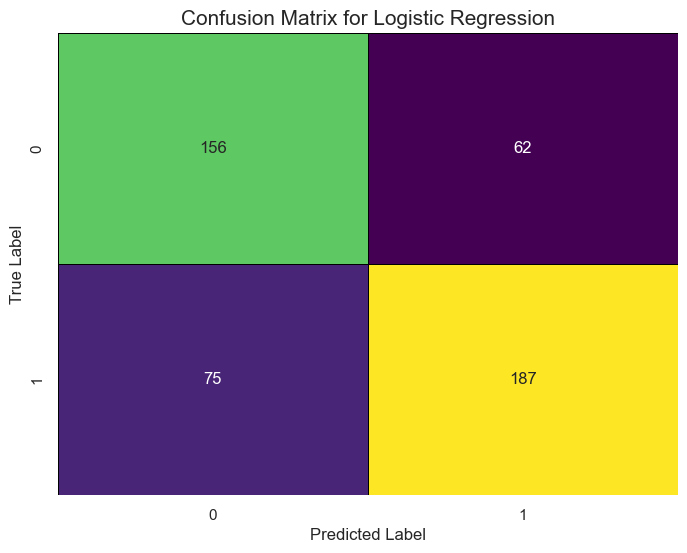

In [155]:
# Assigning testing parameters to a new variable
lr_conf_mat = confusion_matrix(y_test, y_predict_lr)

# Heatmap for confusion matrix visualization
plt.figure(figsize=(8,6))
sns.heatmap(lr_conf_mat, annot=True, fmt='d', cmap='viridis', cbar=False, linewidths=0.5, linecolor='black')

# Adding labels and title
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix for Logistic Regression', fontsize=15)

# Displaying the plot
plt.show()

### Cross-Validation and Classification Report

In [158]:
# Performing cross-validation on Logistic Regression Model
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
print('Cross-validation Scores:', ["{:.2f}".format(score * 100) for score in lr_cv_scores])
print("Mean Cross-validation Score: {:.2f}".format(lr_cv_scores.mean() * 100))
print("Standard Deviation of Cross-Validation Scores: {:.2f}".format(lr_cv_scores.std()))

Cross-validation Scores: ['71.43', '67.86', '73.66', '71.88', '79.37']
Mean Cross-validation Score: 72.84
Standard Deviation of Cross-Validation Scores: 0.04


In [160]:
# Printing classification report for logistic regression model
print("Classification Report:\n", classification_report(y_test, y_predict_lr))

Classification Report:
               precision    recall  f1-score   support

           5       0.68      0.72      0.69       218
           6       0.75      0.71      0.73       262

    accuracy                           0.71       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.72      0.71      0.72       480



# <font color='crimson'>Decision Tree</font>

In [163]:
# Initializing the Decision Tree Classifier 
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=10,
                                  min_samples_leaf=3, splitter='best',class_weight='balanced')

# Trains the model on the training data 
dt_model.fit(X_train,y_train)
# Predicts the labels for the test data
y_predict_dt = dt_model.predict(X_test)

#Evaluating the model
dt_training_accuracy = dt_model.score(X_train,y_train)
print('Trainig accuracy: {:.2f}%'.format(dt_training_accuracy * 100))  
dt_testing_accuracy = dt_model.score(X_test, y_test)
print('Testing accuracy: {:.2f}%'.format(dt_testing_accuracy * 100))

Trainig accuracy: 90.26%
Testing accuracy: 68.54%


### Confusion Matrix

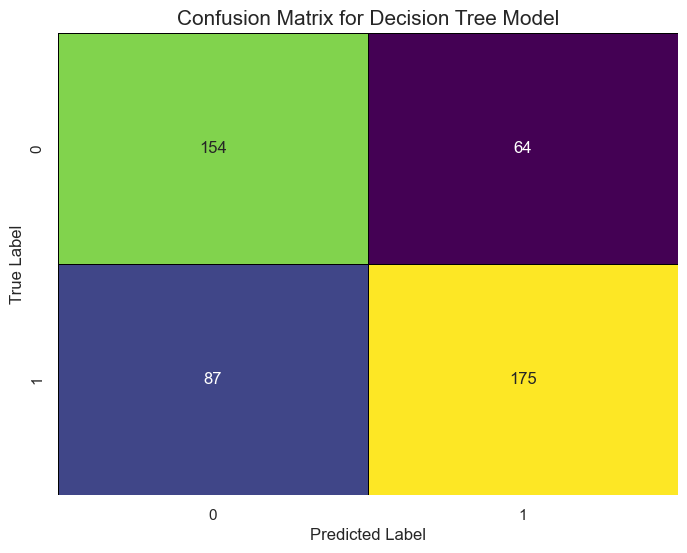

In [166]:
# Assigning testing parameters to a new variable
dt_conf_mat = confusion_matrix(y_test, y_predict_dt)

# Heatmap for confusion matrix visualization
plt.figure(figsize=(8,6))
sns.heatmap(dt_conf_mat, annot=True, fmt='d', cmap='viridis', cbar=False, linewidths=0.5, linecolor='black')

# Adding labels and title
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix for Decision Tree Model', fontsize=15)

# Displaying the plot
plt.show()

### Cross-Validation and Classification Report

In [169]:
# Performing cross-validation on Decision Tree Model
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
print('Cross-validation Scores:', ["{:.2f}".format(score * 100) for score in dt_cv_scores])
print("Mean Cross-validation Score: {:.2f}".format(dt_cv_scores.mean() * 100))
print("Standard Deviation of Cross-Validation Scores: {:.2f}".format(dt_cv_scores.std()))

Cross-validation Scores: ['70.98', '66.96', '63.39', '65.62', '73.99']
Mean Cross-validation Score: 68.19
Standard Deviation of Cross-Validation Scores: 0.04


In [171]:
# Printing classification report for Descision Tree Model
print("Classification Report:\n", classification_report(y_test, y_predict_dt))

Classification Report:
               precision    recall  f1-score   support

           5       0.64      0.71      0.67       218
           6       0.73      0.67      0.70       262

    accuracy                           0.69       480
   macro avg       0.69      0.69      0.68       480
weighted avg       0.69      0.69      0.69       480



# <font color='crimson'>Random Forest</font>

In [174]:
# Initializing the Random Forst Model
rf_model = RandomForestClassifier(criterion='entropy',random_state=42,max_depth=7,max_features=None,
                                  min_samples_leaf=4,min_samples_split=6,
                                  n_estimators=1000,oob_score=True,class_weight='balanced')
# Fitting the Model
rf_model.fit(X_train,y_train)

# Predicting using the Random Forest Model
y_predict_rf = rf_model.predict(X_test)


#Evaluating the Model
rf_training_accuracy = rf_model.score(X_train,y_train)
print('Trainig accuracy: {:.2f}%'.format(rf_training_accuracy * 100))  
rf_testing_accuracy = rf_model.score(X_test, y_test)
print('Testing accuracy: {:.2f}%'.format(rf_testing_accuracy * 100))

Trainig accuracy: 87.13%
Testing accuracy: 75.00%


### Confusion Matrix

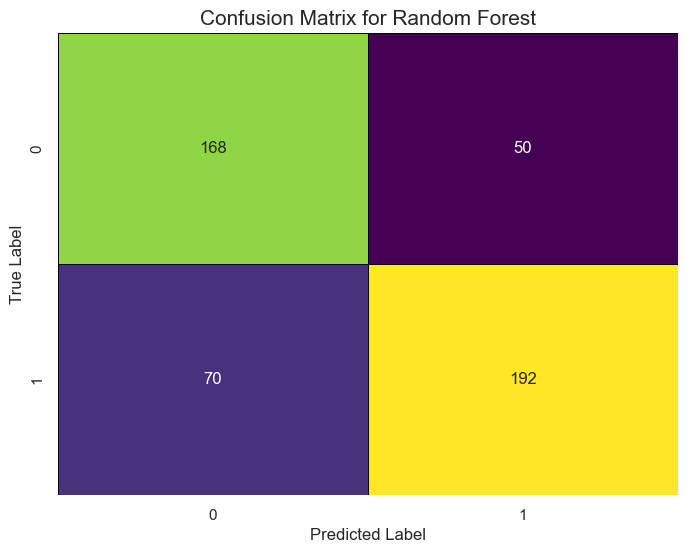

In [177]:
# Assigning testing parameters to a new variable
rf_conf_mat = confusion_matrix(y_test, y_predict_rf)

# Heatmap for confusion matrix visualization
plt.figure(figsize=(8,6))
sns.heatmap(rf_conf_mat, annot=True, fmt='d', cmap='viridis', cbar=False, linewidths=0.5, linecolor='black')

# Add labels and title
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix for Random Forest', fontsize=15)

# Display the plot
plt.show()

### Cross-Validation and Classification Report

In [180]:
# Performing cross-validation on Random Forest Model
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation Scores:", ["{:.2f}".format(score * 100) for score in rf_cv_scores])
print("Mean Cross-validation Score: {:.2f}".format(rf_cv_scores.mean() * 100))
print("Standard Deviation of Cross-Validation Scores: {:.2f}".format(rf_cv_scores.std()))

Cross-validation Scores: ['72.77', '69.64', '74.11', '77.68', '81.61']
Mean Cross-validation Score: 75.16
Standard Deviation of Cross-Validation Scores: 0.04


In [182]:
# Printing classification report for Random Forest Model
print("Classification Report:\n", classification_report(y_test, y_predict_rf))

Classification Report:
               precision    recall  f1-score   support

           5       0.71      0.77      0.74       218
           6       0.79      0.73      0.76       262

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



# <font color='crimson'>K-Nearest Neighbors</font>

In [185]:
# Initialize the KNN model with default parameters
knn_model = KNeighborsClassifier()

# Fit the model
knn_model.fit(X_train, y_train)

# Making Predictions
y_predict_knn = knn_model.predict(X_test)

# Evaluating the model
knn_training_accuracy = knn_model.score(X_train, y_train)
print("Training accuracy: {:.2f}%".format(knn_training_accuracy * 100))
knn_testing_accuracy = knn_model.score(X_test, y_test)
print("Testing accuracy: {:.2f}%".format(knn_testing_accuracy * 100))

Training accuracy: 76.32%
Testing accuracy: 61.25%


### Confusion Matrix

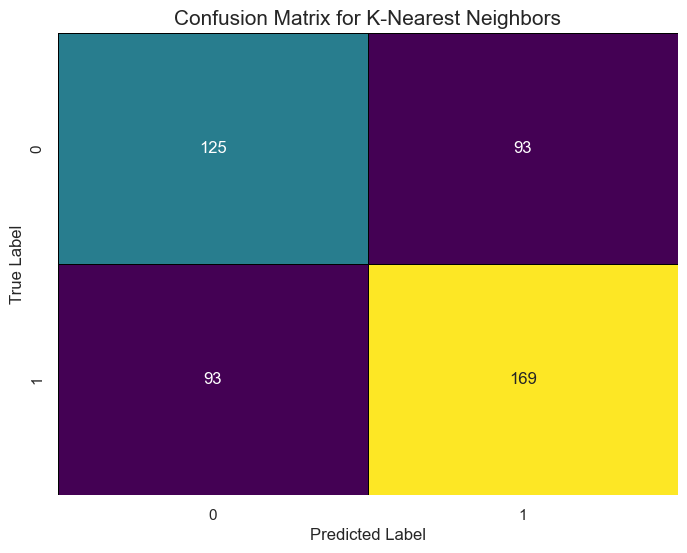

In [188]:
# Assigning testing parameters to a new variable
knn_conf_mat = confusion_matrix(y_test, y_predict_knn)

# Heatmap for confusion matrix visualization
plt.figure(figsize=(8,6))
sns.heatmap(knn_conf_mat, annot=True, fmt='d', cmap='viridis', cbar=False, linewidths=0.5, linecolor='black')

# Adding labels and title
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix for K-Nearest Neighbors', fontsize=15)

# Displaying the plot
plt.show()

### Cross-Validation and Classification Report

In [191]:
# Cross-validation for K-Nearest neighbors classifier
knn_cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:",  ["{:.2f}".format(score * 100) for score in knn_cv_scores])
print("Mean Cross-Validation Score: {:.2f}".format(knn_cv_scores.mean() * 100))
print("Standard Deviation of Cross-Validation Scores: {:.2f}".format(knn_cv_scores.std()))

Cross-Validation Scores: ['62.50', '56.70', '61.61', '64.29', '59.19']
Mean Cross-Validation Score: 60.86
Standard Deviation of Cross-Validation Scores: 0.03


In [193]:
# Printing classification report for K-Nearest neighbors classifier
print("Classification Report:\n", classification_report(y_test, y_predict_knn))

Classification Report:
               precision    recall  f1-score   support

           5       0.57      0.57      0.57       218
           6       0.65      0.65      0.65       262

    accuracy                           0.61       480
   macro avg       0.61      0.61      0.61       480
weighted avg       0.61      0.61      0.61       480



# <font color='crimson'>ROC Curve and AUC Score summary</font>

In [196]:
from sklearn.preprocessing import label_binarize

# Binarizing the output for multiclass classification
y_train_bin = label_binarize(y_train, classes=[5, 6])
y_test_bin = label_binarize(y_test, classes=[5, 6])

# Initializing the models
lr_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()

# Fitting models
lr_model.fit(X_train, y_train_bin)
dt_model.fit(X_train, y_train_bin)
rf_model.fit(X_train, y_train_bin)
knn_model.fit(X_train, y_train_bin)

# Predicting probabilities
lr_probs = lr_model.predict_proba(X_test)
dt_probs = dt_model.predict_proba(X_test)
rf_probs = rf_model.predict_proba(X_test)
knn_probs = knn_model.predict_proba(X_test)

In [198]:
# Assuming y_test contains the true labels and *_probs are the predicted probabilities for class 6 (class 1 after encoding)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs[:, 1], pos_label = 6)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs[:, 1], pos_label = 6)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs[:, 1], pos_label = 6)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs[:, 1], pos_label = 6)

# Calculate ROC AUC score for each model
roc_auc_lr = roc_auc_score(y_test, lr_probs[:, 1])
roc_auc_dt = roc_auc_score(y_test, dt_probs[:, 1])
roc_auc_rf = roc_auc_score(y_test, rf_probs[:, 1])
roc_auc_knn = roc_auc_score(y_test, knn_probs[:, 1])

# Print ROC AUC scores
print('Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr))
print('Decision Tree (AUC = {:.2f})'.format(roc_auc_dt))
print('Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
print('K-Nearest Neighbors (AUC = {:.2f})'.format(roc_auc_knn))

Logistic Regression (AUC = 0.77)
Decision Tree (AUC = 0.74)
Random Forest (AUC = 0.86)
K-Nearest Neighbors (AUC = 0.66)


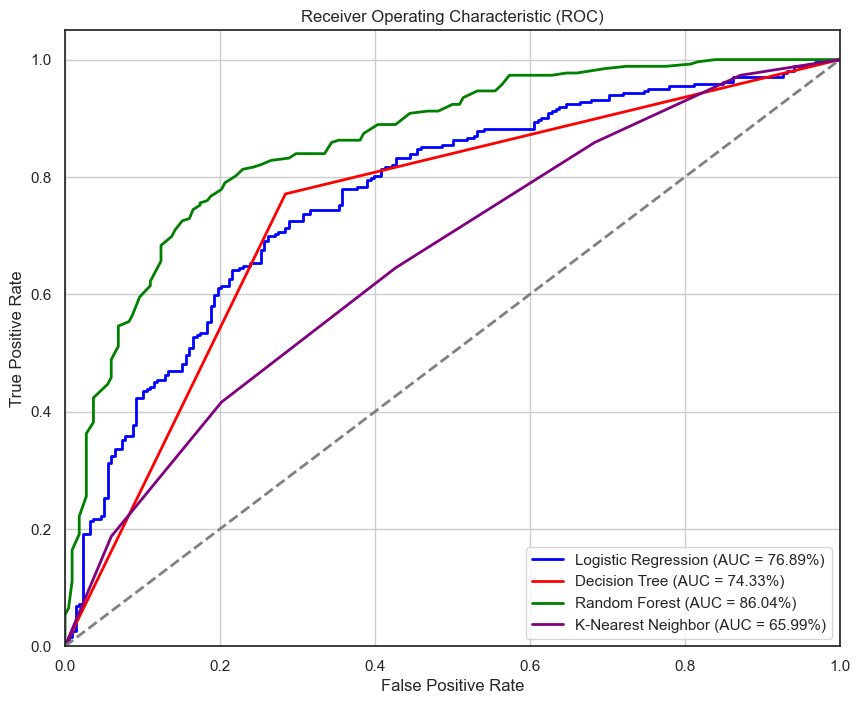

In [200]:
plt.figure(figsize=(10, 8))

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = {:.2f}%)'.format(roc_auc_lr*100))
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Decision Tree (AUC = {:.2f}%)'.format(roc_auc_dt*100))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = {:.2f}%)'.format(roc_auc_rf*100))
plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, label='K-Nearest Neighbor (AUC = {:.2f}%)'.format(roc_auc_knn*100))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)

# <font color='crimson'>Models Compilation</font>

In [203]:
# Creating an empty dictionary to store the results
results = {
    'Logistic Regression': {'Accuracy': 71.46, 'Precision': 0.72, 'Recall': 0.71, 'F1-Score': 0.72},
    'Decision Tree': {'Accuracy': 68.54, 'Precision': 0.69, 'Recall': 0.69, 'F1-Score': 0.69},
    'Random Forest': {'Accuracy': 75.00, 'Precision': 0.75, 'Recall': 0.75, 'F1-Score': 0.75},
    'K-Nearest Neighbor': {'Accuracy': 61.25, 'Precision': 0.61, 'Recall': 0.61, 'F1-Score': 0.61}
}

# Converted the dictionary into a pandas DataFrame
results_df = pd.DataFrame(results).T  # Transpose to have models as rows

# Displaying the DataFrame
print(results_df)

                     Accuracy  Precision  Recall  F1-Score
Logistic Regression     71.46       0.72    0.71      0.72
Decision Tree           68.54       0.69    0.69      0.69
Random Forest           75.00       0.75    0.75      0.75
K-Nearest Neighbor      61.25       0.61    0.61      0.61


In [205]:
# Displaying the DataFrame with sorted models based on Accuracy
sorted_results_df = results_df.sort_values(by='Accuracy', ascending=False)
print(sorted_results_df)

                     Accuracy  Precision  Recall  F1-Score
Random Forest           75.00       0.75    0.75      0.75
Logistic Regression     71.46       0.72    0.71      0.72
Decision Tree           68.54       0.69    0.69      0.69
K-Nearest Neighbor      61.25       0.61    0.61      0.61
